In [1]:
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import warnings
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [2]:
ev_fiyatları=pd.read_csv("train.csv")

In [3]:
ev_fiyatları.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [4]:
ev_fiyatları.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
def null_degerler(df):
    null_df=pd.DataFrame()
    null_df['yüzde']=df.isnull().sum()*100/df.shape[0]
    null_df['adet']=df.isnull().sum()
    return null_df.sort_values('yüzde',ascending=False)
null_degerler(ev_fiyatları)

,yüzde,adet
PoolQC,99.520548,1453
MiscFeature,96.301370,1406
Alley,93.767123,1369
Fence,80.753425,1179
FireplaceQu,47.260274,690
...,...,...
ExterQual,0.000000,0
Exterior2nd,0.000000,0
Exterior1st,0.000000,0
RoofMatl,0.000000,0


In [6]:
ev_fiyatları.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [7]:
ev_fiyatları['Alley'].fillna("None",inplace = True)

In [8]:
ev_fiyatları.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [9]:
ev_fiyatları['FireplaceQu'].fillna("None",inplace = True)

In [10]:
ev_fiyatları.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [11]:
ev_fiyatları['PoolQC'].fillna("None",inplace = True)

In [12]:
ev_fiyatları.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [13]:
ev_fiyatları['Fence'].fillna("None",inplace = True)

In [14]:
ev_fiyatları.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [15]:
ev_fiyatları['MiscFeature'].fillna("None",inplace = True)

In [16]:
ev_fiyatları.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [17]:
ev_fiyatları['BsmtQual'].fillna("None",inplace = True)

In [18]:
ev_fiyatları.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [19]:
ev_fiyatları['BsmtCond'].fillna("None",inplace = True)

In [20]:
ev_fiyatları.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [21]:
ev_fiyatları['BsmtExposure'].fillna("None",inplace = True)

In [22]:
ev_fiyatları.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [23]:
ev_fiyatları['BsmtFinType1'].fillna("None",inplace = True)

In [24]:
ev_fiyatları.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [25]:
ev_fiyatları['BsmtFinType2'].fillna("None",inplace = True)

In [26]:
ev_fiyatları.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [27]:
ev_fiyatları.MasVnrArea.unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [28]:
ev_fiyatları.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [29]:
ev_fiyatları['GarageType'].fillna("None",inplace = True)

In [30]:
ev_fiyatları.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [31]:
ev_fiyatları.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [32]:
ev_fiyatları['GarageFinish'].fillna("None",inplace = True)

In [33]:
ev_fiyatları.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [34]:
ev_fiyatları['GarageQual'].fillna("None",inplace = True)

In [35]:
ev_fiyatları.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [36]:
ev_fiyatları['GarageCond'].fillna("None",inplace = True)

In [37]:
ev_fiyatları.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [39]:
ev_fiyatları=ev_fiyatları.dropna(subset=['Electrical'])

Hedef değişkenimiz SalePrice

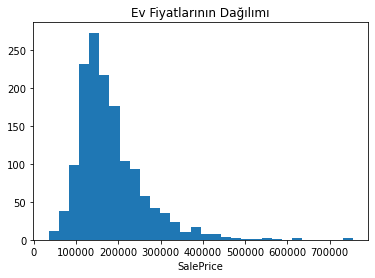

In [40]:
#ev_fiyatları.SalePrice.unique()
plt.hist(ev_fiyatları.SalePrice, bins=30)
plt.title("Ev Fiyatlarının Dağılımı")
plt.xlabel("SalePrice")
plt.show()

In [41]:
ev_fiyatları["PoolQC_"] = ev_fiyatları.PoolQC.replace({ "None":0, "Fa":1, "Gd":2, "Ex":3 })

In [42]:
ev_fiyatları["CentralAir_"] = pd.get_dummies(ev_fiyatları.CentralAir, drop_first=True)

In [43]:
ev_fiyatları["Alley_"] = ev_fiyatları.Alley.replace({'None':0, 'Grvl':1, 'Pave':2 })

In [44]:
ev_fiyatları["Fence"].unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [45]:
ev_fiyatları["Fence_"] = ev_fiyatları.Fence.replace({'None':0, 'MnWw' :1,'GdWo':2, 'MnPrv':3, 'GdPrv':4 })

In [46]:
ev_fiyatları["LandContour_"] = ev_fiyatları.LandContour.replace({'Lvl':0, 'Bnk':1, 'Low':2, 'HLS':3})

In [47]:
ev_fiyatları.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [48]:
ev_fiyatları.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

<Figure size 600x400 with 0 Axes>

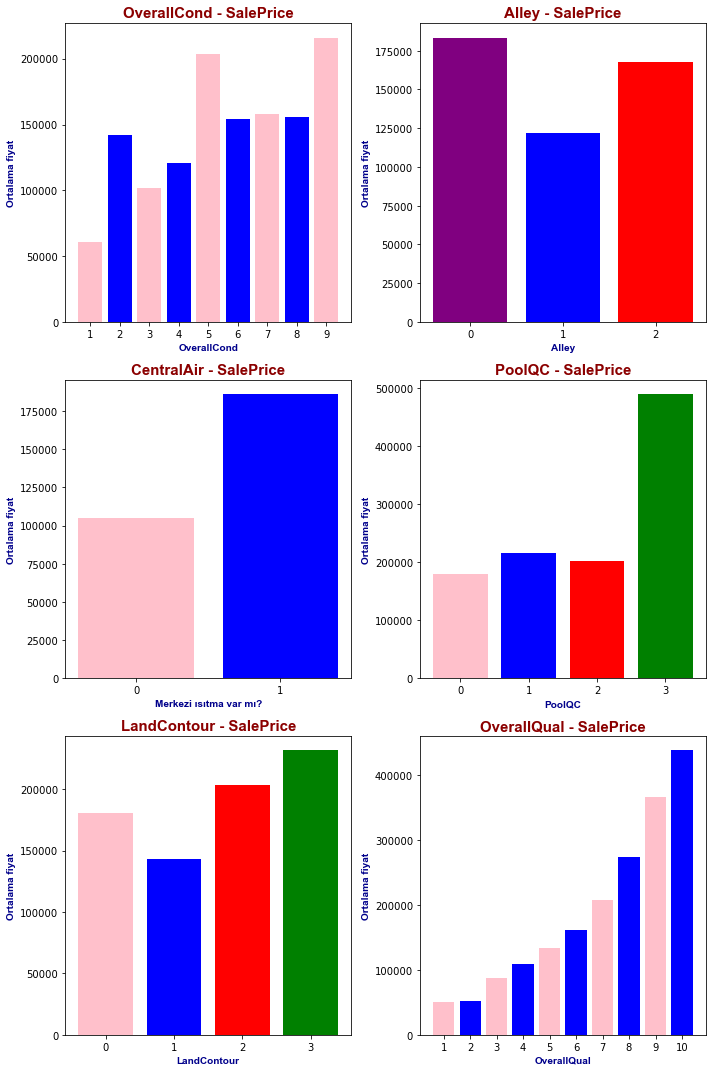

In [49]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.figure(figsize=(10,15))
plt.subplot(3,2,1)

plt.bar(ev_fiyatları.groupby("OverallCond")["SalePrice"].mean().index, 
        ev_fiyatları.groupby("OverallCond")["SalePrice"].mean(),
        color=("pink","blue"))
plt.title("OverallCond - SalePrice", fontdict = baslik_font)
plt.ylabel("Ortalama fiyat", fontdict = eksen_font)
plt.xlabel("OverallCond", fontdict = eksen_font)
plt.xticks([1,2,3,4,5,6,7,8,9])

plt.subplot(3,2,2)
plt.bar(ev_fiyatları.groupby("Alley_")["SalePrice"].mean().index, 
        ev_fiyatları.groupby("Alley_")["SalePrice"].mean(),
        color=("purple","blue","red"))
plt.title("Alley - SalePrice", fontdict = baslik_font)
plt.ylabel("Ortalama fiyat", fontdict = eksen_font)
plt.xlabel("Alley", fontdict = eksen_font)
plt.xticks([0,1,2])

plt.subplot(3,2,3)
plt.bar(ev_fiyatları.groupby("CentralAir_")["SalePrice"].mean().index, 
        ev_fiyatları.groupby("CentralAir_")["SalePrice"].mean(),
        color=("pink","blue"))
plt.title("CentralAir - SalePrice", fontdict = baslik_font)
plt.ylabel("Ortalama fiyat", fontdict = eksen_font)
plt.xlabel("Merkezi ısıtma var mı?", fontdict = eksen_font)
plt.xticks([0,1])

plt.subplot(3,2,4)
plt.bar(ev_fiyatları.groupby("PoolQC_")["SalePrice"].mean().index, 
        ev_fiyatları.groupby("PoolQC_")["SalePrice"].mean(),
        color=("pink","blue","red","green"))
plt.title("PoolQC - SalePrice", fontdict = baslik_font)
plt.ylabel("Ortalama fiyat", fontdict = eksen_font)
plt.xlabel("PoolQC", fontdict = eksen_font)
plt.xticks([0,1,2,3])

plt.subplot(3,2,5)
plt.bar(ev_fiyatları.groupby("LandContour_")["SalePrice"].mean().index, 
        ev_fiyatları.groupby("LandContour_")["SalePrice"].mean(),
        color=("pink","blue","red","green"))
plt.title("LandContour - SalePrice", fontdict = baslik_font)
plt.ylabel("Ortalama fiyat", fontdict = eksen_font)
plt.xlabel("LandContour", fontdict = eksen_font)
plt.xticks([0,1,2,3])

plt.subplot(3,2,6)
plt.bar(ev_fiyatları.groupby("OverallQual")["SalePrice"].mean().index, 
        ev_fiyatları.groupby("OverallQual")["SalePrice"].mean(),
        color=("pink","blue"))
plt.title("OverallQual - SalePrice", fontdict = baslik_font)
plt.ylabel("Ortalama fiyat", fontdict = eksen_font)
plt.xlabel("OverallQual", fontdict = eksen_font)
plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.tight_layout()
plt.show()

In [50]:
Y = ev_fiyatları['SalePrice']
X = ev_fiyatları[["OverallCond","Alley_","CentralAir_","PoolQC_","LandContour_","OverallQual"]]

In [51]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [  -513.49074321 -14212.29705928  10563.47122806  27912.17740264
   7861.00626415  44397.53680285]
Sabit değer (bias): 
 -97427.75405178385


In [53]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     427.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          2.35e-316
Time:                        15:28:51   Log-Likelihood:                -17790.
No. Observations:                1459   AIC:                         3.559e+04
Df Residuals:                    1452   BIC:                         3.563e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.743e+04   9209.263    -10.579      0.000   -1.15e+05   -7.94e+04
OverallCond   -513.4907   1146.708     -0.448      0.654   -2762.873    1735.892
Alley_       -1.421e+04   3411.528     -4.166      0.000   -2.09e+04   -7520.247
CentralAir_   1.056e+04   5406.860      1.954      0.051     -42.621    2.12e+04
PoolQC_       2.791e+04   8516.871      3.277      0.001    1.12e+04    4.46e+04
LandContour_  7861.0063   1955.881      4.019      0.000    4024.352    1.17e+04
OverallQual    4.44e+04    955.103     46.485      0.000    4.25e+04    4.63e+04
==============================================================================
Omnibus:                      538.943   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5097.198
Skew:                           1.446   Prob(JB):                         0.00
Kurtosis:                      11.688   Cond. No.                         63.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
results.params

const          -97427.754052
OverallCond      -513.490743
Alley_         -14212.297059
CentralAir_     10563.471228
PoolQC_         27912.177403
LandContour_     7861.006264
OverallQual     44397.536803
dtype: float64